In [1]:
import numpy as np
import pandas as pd
import tensorflow
import keras
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten
from keras.layers import Conv1D
from keras.models import Sequential
import itertools
import matplotlib.pyplot as plt
%matplotlib inline



C:\local\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Load test data

In [2]:
data=np.load('overnight_all_compressed.npz')
eval_data = data['arr_2']

Load train data from zip file and merge all files in to single array

In [3]:
x = np.load('overnight_all_compressed_new.npz')
print(x)
x_t=[]
final_array=np.array([])

a = x['arr_0']
b = x['arr_1']

print(a.shape)
print(b.shape)


final_array=np.vstack([a,b])

print(final_array.shape)

'''for i in x:
    
    print(x[i].shape)
    temp=x[i]
    final_array = np.hstack()
    final_array = np.concatenate((final_array,temp),axis=0)'''
    #np.concatenate(p,x[i])
    #p =np.concatenate((p,temp),axis=0)
    #np.append(x[i])
    
#data=['seconds','mic (trachea)','abdominal movement (stretch sensor)','thorax movement (stretch sensor)']
#x = pd.DataFrame(x['arr_0'], columns = data)
#x = pd.DataFrame(x['arr_1'], columns = data)

#merged = list(itertools.chain.from_iterable(x_t))


(11044514, 4)
(4769867, 4)
(15814381, 4)


'for i in x:\n    \n    print(x[i].shape)\n    temp=x[i]\n    final_array = np.hstack()\n    final_array = np.concatenate((final_array,temp),axis=0)'

Divide data into X & Y sets for the train and validation data

In [4]:
X_train = final_array[:,1]
Y_train = final_array[:,2]

Divide X & Y sets for the test data

In [5]:
time=eval_data[:100000,0]
x_pred=eval_data[:100000,5].reshape(100000,1,1)
y_true=eval_data[:100000,2]

model 1 with 1D Convolution layers and final dense/FC layer with filter of size 1,1,1

In [6]:
def Conv_test():
    model = Sequential()
    model.add(Convolution1D(32,1,border_mode='same',activation='relu'))
    model.add(Convolution1D(16,1,border_mode='same',activation='relu'))
    model.add(Convolution1D(2,1,border_mode='same',activation='relu'))
    model.add(Dense(1,activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
    return model

model 2 with 1D Convolution layers and final dense/FC layer with filter of size 3, 1, 1

In [7]:
def Conv1D_test():
    model = Sequential()
    model.add(Conv1D(64,3,padding='same',activation='relu'))
    model.add(Conv1D(16,1,padding='same',activation='relu'))
    model.add(Conv1D(2,1,padding='same',activation='relu'))
    model.add(Dense(1,activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
    return model

Split train data into train and validation using scikit method

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X_train,Y_train, test_size=0.33)

manually splitting train data  into train (70%) and validation (30% )

In [9]:
l= len(X_train)
Xtrain = X_train[:round(l*0.7)]
Xtest = X_train[round(l*0.7)+1:]
ytrain = Y_train[:round(l*0.7)]
ytest = Y_train[round(l*0.7)+1:]

(10595635, 1, 1)


C:\local\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 1, activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\local\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 1, activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\local\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(2, 1, activation="relu", padding="same")`
  """


Train on 10595635 samples, validate on 5218746 samples
Epoch 1/10
 - 25s - loss: 0.3567 - acc: 0.0000e+00 - val_loss: 0.3415 - val_acc: 0.0000e+00
Epoch 2/10
 - 24s - loss: 0.3416 - acc: 0.0000e+00 - val_loss: 0.3415 - val_acc: 0.0000e+00
Epoch 3/10
 - 24s - loss: 0.3415 - acc: 0.0000e+00 - val_loss: 0.3412 - val_acc: 0.0000e+00
Epoch 4/10
 - 23s - loss: 0.3414 - acc: 0.0000e+00 - val_loss: 0.3413 - val_acc: 0.0000e+00
Epoch 5/10
 - 24s - loss: 0.3413 - acc: 0.0000e+00 - val_loss: 0.3426 - val_acc: 0.0000e+00
Epoch 6/10
 - 24s - loss: 0.3413 - acc: 0.0000e+00 - val_loss: 0.3442 - val_acc: 0.0000e+00
Epoch 7/10
 - 24s - loss: 0.3413 - acc: 0.0000e+00 - val_loss: 0.3413 - val_acc: 0.0000e+00
Epoch 8/10
 - 24s - loss: 0.3412 - acc: 0.0000e+00 - val_loss: 0.3413 - val_acc: 0.0000e+00
Epoch 9/10
 - 23s - loss: 0.3412 - acc: 0.0000e+00 - val_loss: 0.3414 - val_acc: 0.0000e+00
Epoch 10/10
 - 24s - loss: 0.3412 - acc: 0.0000e+00 - val_loss: 0.3412 - val_acc: 0.0000e+00
dict_keys(['val_loss', '

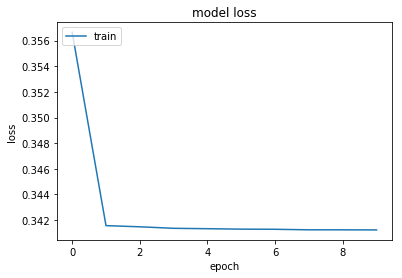

In [15]:


Xtrain=(Xtrain).reshape(len(Xtrain),1,1)

ytrain=ytrain.reshape(len(ytrain),1,1)

Xtest=Xtest.reshape(len(Xtest),1,1)

ytest=ytest.reshape(len(ytest),1,1)

validationData=(Xtest,ytest)
'''
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)'''
print(Xtrain.shape)
model=Conv_test()
history = model.fit(Xtrain,ytrain,validation_data=validationData,epochs=10,batch_size=1000, verbose=2)
print(history.history.keys())
#y_pred=model.predict(x_pred)
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(100000, 1, 1)


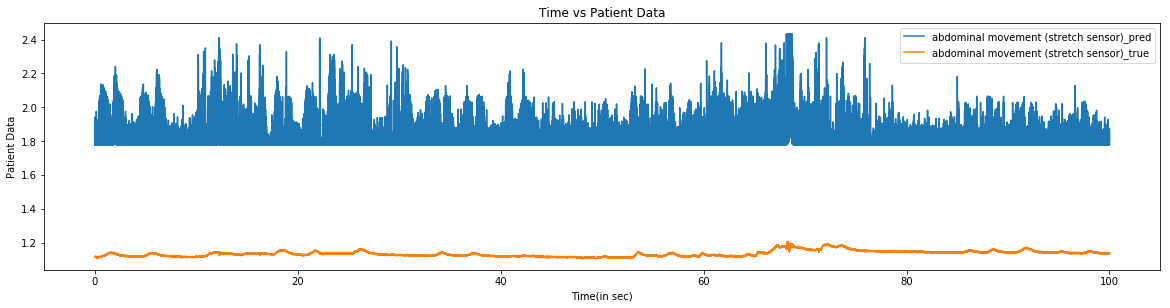

In [16]:


y_pred=model.predict(x_pred)
print(y_pred.shape)
y_pred= y_pred.reshape(100000,1)
fig = plt.figure(figsize=(20,10))
#for ix,items in zip([1,2],x):
ax = fig.add_subplot(2,1,1)
ax.set_title('Time vs Patient Data')
ax.set_xlabel('Time(in sec)')
ax.set_ylabel('Patient Data')
ax.plot(time,y_pred,label='abdominal movement (stretch sensor)_pred')
ax.plot(time,y_true,label='abdominal movement (stretch sensor)_true')



ax.legend()


In [12]:
from sklearn.model_selection import TimeSeriesSplit


tscv = TimeSeriesSplit(n_splits=1)

for train, test in tscv.split(final_array):
    print(len(train))
    print(len(test))
    X_train=(final_array[train][:,1]).reshape(1,len(train),1)
    #X_train=X_train.reshape(1,len(train),1)
    Y_train=final_array[train][:,2].reshape(1,len(train),1)
    #Y_train.reshape(1,len(train),1)
    X_test=final_array[test][:,1].reshape(1,len(test),1)
    #X_test.reshape(1,len(test),1)
    Y_test=final_array[test][:,2].reshape(1,len(test),1)
    #Y_test.reshape(1,len(test),1)
    validationData=(X_test,Y_test)
    
    print(X_train.shape)
    print(Y_train.shape)
    print(X_test.shape)
    print(Y_test.shape)
    model=Conv_test()
    history = model.fit(X_train,Y_train,epochs=50,batch_size=10, verbose=2)
    print(history.history.keys())
    #y_pred=model.predict(x_pred)
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

X = x['mic (trachea)'][:10000]
print(X.shape)
[:10000]
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)  

#for train, test in tscv.split(X):
    #print(train)
    #print(y[test])
model = oneDC_model()
#x_ = X[train].reshape(1,len(train),1)

print(x_.shape)
y_=y[train].reshape(1,2500)
model.fit(X,y,epochs=1,batch_size=1000, verbose=2)

pred =model.predict(X[test])
#print('*****')
#print(pred)
scores = model.evaluate(pred,y[test])

#print(model.metrics_names)
print(scores[1])
#[1],scores[1])
print(model.metrics_names[0],scores[0])

    #print("%s %s" % (y[test], pred))
